**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading book data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Beejal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.

In [3]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.shape
# So there are Two hunderd seventy one thousand three hundred and sixty records (Close to 3 lakh books)

(271360, 8)

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
#Loading user data
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

In [7]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
users.shape
# There are Two hunderd seventy eight thousand eight hundred and fifty eight users (close to 3 lakh)

(278858, 3)

In [9]:
users.info()
# Age information is missing in large number of records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
#Loading rating data
ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [11]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
ratings.shape
# Over 1 million ratings

(1149780, 3)

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Check no.of records and features given in each dataset

In [14]:
# Done above

## Exploring books dataset

In [15]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [16]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis=1, inplace=True)

In [17]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [18]:
books['yearOfPublication'].unique()
# [Beejal] There are a couple of non-numeric values - 'DK Publishing Inc', 'Gallimard'
# Also some of the year values are given as strings.
# In fact presence of these values doesn't allow this column to be numeric

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [19]:
bad = books[(books['yearOfPublication'] == 'DK Publishing Inc') | (books['yearOfPublication'] == 'Gallimard')]
bad

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [20]:
# [Beejal] So there are 3 bad records

### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [21]:
books.shape

(271360, 5)

In [22]:
books.drop(bad.index.tolist(), inplace=True, errors='ignore')
books.shape

(271357, 5)

### Change the datatype of yearOfPublication to 'int'

In [23]:
books['yearOfPublication'] = books['yearOfPublication'].astype('int')

In [24]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [25]:
# [Beejal] Let's first check which records would be affected by this operation
bad = books[books['publisher'].isna()]
bad

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [26]:
# [Beejal] Now that we know which records are getting dropped, let's go ahead and drop them. Ideally one should consult 
# domain expert before dropping such records.

books.drop(bad.index.tolist(), inplace=True, errors='ignore')
books.shape

(271355, 5)

## Exploring Users dataset

In [27]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [28]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [29]:
users[(users['Age'].isnull())].shape
# [Beejal] Already there are 110762 users with Age as null. So following operation will add to this number.

(110762, 3)

In [30]:
bad = users[(users['Age'] < 5) | (users['Age'] > 90)]
bad

,userID,Location,Age
219,220,"bogota, bogota, colombia",0.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
612,613,"ankara, n/a, turkey",1.0
670,671,"jeddah, jeddah, saudi arabia",1.0
931,932,"san francisco, california, usa",1.0
1148,1149,"orlando, florida, usa",1.0
1288,1289,"san jose, california, usa",103.0
1322,1323,"milano, lombardia, italy",104.0
1460,1461,"kolding, none, denmark",0.0


In [31]:
# [Beejal] So there are 1312 records with corrupt value for Age column; Let's replace it with np.nan
users.loc[bad.index,'Age'] = np.nan

# [Beejal] So now we should have a total of 1,12,074 with null value for Age column (110762 + 1312 = 112074)

In [32]:
# [Beejal] Let's check if there are any bad ones after replacement
users[(users['Age'] < 5) | (users['Age'] > 90)]

# [Beejal] So we don't have any bad records anymore

,userID,Location,Age


### Replace null values in column `Age` with mean

In [33]:
# [Beejal] So now let's replace null value in Age column with mean age. This is going to impact a total of 1,12,074 records.
# We need to first find the mean of 
bad = users[users['Age'].isnull()]
users.loc[bad.index,'Age'] = users['Age'].mean()

In [34]:
# [Beejal] Let's check if there aren't any left now
users[users['Age'].isnull()]

,userID,Location,Age


### Change the datatype of `Age` to `int`

In [35]:
users['Age'] = users['Age'].astype('int')

In [36]:
# [Beejal] Let's assert that Age has been changed to int now (int32 actually)
users['Age'].dtype

dtype('int32')

In [37]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [38]:
ratings.shape

(1149780, 3)

In [39]:
n_users = users.shape[0]
n_books = books.shape[0]
n_users, n_books

(278858, 271355)

In [40]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [41]:
# Example to understand what should I use.. join or merge? Let's check it out.
df = pd.DataFrame({'key': ['K00', 'K1', 'K2', 'K3', 'K4', 'K5'],
                    'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
df

,key,A
0,K00,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [42]:
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                       'B': ['B0', 'B1', 'B2']})
other

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [43]:
df.join(other, how='inner', lsuffix='_L', rsuffix="_R")
# This is joining two dataframes on index, but not on key column.

,key_L,A,key_R,B
0,K00,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2


In [44]:
# Let's try merge.
df.merge(other, on="key", how="inner")
# So it looks like this is working perfectly as we needed

,key,A,B
0,K1,A1,B1
1,K2,A2,B2


In [45]:
ratings_for_existing_books = ratings.merge(books, on=['ISBN'], how='inner')[['userID', 'ISBN', 'bookRating']]
ratings_for_existing_books.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,2313,034545104X,5
2,6543,034545104X,0
3,8680,034545104X,5
4,10314,034545104X,9


In [46]:
ratings.shape, ratings_for_existing_books.shape
# So we discarded 1,18,650 ratings (1149780 - 1031130 =‬ 1,18,650) for which we couldn't find corresponding book in books dataset

((1149780, 3), (1031130, 3))

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [47]:
ratings_for_existing_books_users = ratings_for_existing_books.merge(users, how='inner')[['userID', 'ISBN', 'bookRating']]
ratings_for_existing_books_users.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,2313,034545104X,5
2,2313,0812533550,9
3,2313,0679745580,8
4,2313,0060173289,9


In [48]:
ratings_for_existing_books_users.shape, ratings_for_existing_books.shape
# So didn't discard any more ratings

((1031130, 3), (1031130, 3))

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [49]:
ratings_good = ratings_for_existing_books_users[ratings_for_existing_books_users['bookRating'].between(1, 10, inclusive=True)]
ratings_good.head()

,userID,ISBN,bookRating
1,2313,034545104X,5
2,2313,0812533550,9
3,2313,0679745580,8
4,2313,0060173289,9
5,2313,0385482388,5


In [50]:
ratings_good.shape, ratings_for_existing_books_users.shape
# So looks like we lost a lot of ratings - ( 1031130 - 383839 = 6,47,291)

((383839, 3), (1031130, 3))

In [51]:
sorted(ratings_good['bookRating'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### Find out which rating has been given highest number of times

In [52]:
ratings_good['bookRating'].value_counts()

8     91804
10    71225
7     66401
9     60776
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

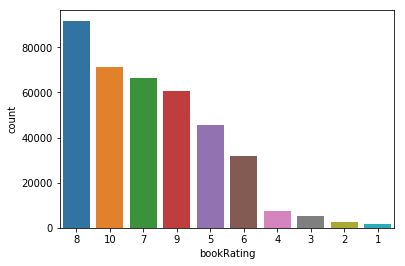

In [53]:
sns.countplot(ratings_good['bookRating'], order=ratings_good['bookRating'].value_counts().index)

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [54]:
user_value_counts = ratings_good['userID'].value_counts() > 100
users_with_atleast_100_ratings = user_value_counts[user_value_counts].index
users_with_atleast_100_ratings

ratings_final = ratings_good[ratings_good['userID'].isin(users_with_atleast_100_ratings)]
ratings_final.head()

,userID,ISBN,bookRating
43,6543,0446605484,10
47,6543,0805062971,8
48,6543,0345342968,8
49,6543,0446610038,9
55,6543,0061009059,8


In [55]:
ratings_final.shape, ratings_good.shape
# So we lose 2,81,470 records (383839 - 102369)

((102369, 3), (383839, 3))

In [56]:
ratings_final[ratings_final['userID'] == 11676].shape

(6943, 3)

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [57]:
sum(ratings_final['bookRating'].isnull())

0

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [58]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV

In [59]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_final, reader)

In [60]:
# Let's run GridSearchCV to find the best parameters
param_grid = {'n_epochs': [5, 10, 20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.5250461362504846
{'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.4}


In [61]:
# Now let's build & train SVD (Singular Value Decomposition) model using these hyper parameters

In [62]:
svd = SVD(n_epochs=10, lr_all=0.005, reg_all=0.4, n_factors=50)

In [63]:
# Let's build a train set first
# build_full_trainset method - Does not split the dataset into folds and 
# just returns a trainset as is, built from the whole dataset.
trainset = data.build_full_trainset()

In [64]:
svd.fit(trainset)

In [65]:
# Now let's build a test set using build_anti_testset() method 
# The ratings in test set are all the ratings that are not in the trainset, 
# i.e. all the ratings rui where the user u is known, the item i is known, 
# but the rating rui is not in the trainset. 
# As rui is unknown, it is either replaced by the fill value or 
# assumed to be equal to the mean of all ratings global_mean.
testset = trainset.build_anti_testset()

In [66]:
predictions = svd.test(testset)

In [67]:
predictions[0:10]
# Just take a note that r_ui (True value) is same for all. This is because it takes global_mean and fills it up
# as we don't have the true rui available for these ratings.

[Prediction(uid=6543, iid='0446520802', r_ui=7.82591409508738, est=7.825585165036687, details={'was_impossible': False}),
 Prediction(uid=6543, iid='0684867621', r_ui=7.82591409508738, est=7.554870028097821, details={'was_impossible': False}),
 Prediction(uid=6543, iid='0316666343', r_ui=7.82591409508738, est=8.06653092090916, details={'was_impossible': False}),
 Prediction(uid=6543, iid='015644450X', r_ui=7.82591409508738, est=7.666211736207376, details={'was_impossible': False}),
 Prediction(uid=6543, iid='0670869902', r_ui=7.82591409508738, est=7.485452002096258, details={'was_impossible': False}),
 Prediction(uid=6543, iid='039480001X', r_ui=7.82591409508738, est=8.118934028118707, details={'was_impossible': False}),
 Prediction(uid=6543, iid='0394800028', r_ui=7.82591409508738, est=7.909383761206851, details={'was_impossible': False}),
 Prediction(uid=6543, iid='0394800184', r_ui=7.82591409508738, est=8.025310641402857, details={'was_impossible': False}),
 Prediction(uid=6543, iid

In [68]:
# Let's check the size of pu (User factors). The number of columns is 50 which means it created 50 latent factors
# for user
pd.DataFrame(svd.pu).shape

(440, 50)

In [69]:
# Let's check the size of qi (Item factors). The number of columns is 50 which means it created 50 latent factors
# for item
pd.DataFrame(svd.qi).shape

(66074, 50)

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [70]:
userID = 2110

In [71]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [72]:
from collections import defaultdict
top_n = defaultdict(list)
for uid, iid, true_r, est, _ in predictions:
    top_n[uid].append((iid, est))

In [73]:
for uid, user_ratings in top_n.items():
    user_ratings.sort(key=lambda x : x[1], reverse=True)
    top_n[uid] = user_ratings

In [74]:
# Now let's fetch the predicted ratings for userID = 2110. They are sorted in descending order.
# In each tuple below, the first value is Item Id and Second value is predicted rating
user_2110_predicted_ratings = pd.DataFrame(top_n[userID], columns=['ISBN', 'Predicted Rating'])
user_2110_predicted_ratings.head()

,ISBN,Predicted Rating
0,0345361792,8.934054
1,0140143505,8.926579
2,0446310786,8.925104
3,0553274295,8.887188
4,0064400557,8.876691


### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [75]:
# Not sure what explicitly interacted books mean here. But looks like it's asking to fetch the ratings that were
# explicitly given by user with userID = 2110
user_data = ratings_final[ratings_final['userID'] == userID].sort_values(by="ISBN", axis=0)

In [76]:
user_data.head()

,userID,ISBN,bookRating
670379,2110,0060987529,7
670375,2110,0064472779,8
670380,2110,0140022651,10
670381,2110,0142302163,8
670369,2110,0151008116,5


In [77]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [78]:
user_full_info = user_data.merge(books, how='inner')
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [79]:
user_2110_predicted_ratings.head(10).merge(books, how='inner')

,ISBN,Predicted Rating,bookTitle,bookAuthor,yearOfPublication,publisher
0,0345361792,8.934054,A Prayer for Owen Meany,John Irving,1990,Ballantine Books
1,0140143505,8.926579,84 Charing Cross Road,Helene Hanff,1990,Penguin Books
2,0446310786,8.925104,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company
3,0553274295,8.887188,Where the Red Fern Grows,Wilson Rawls,1984,Random House Children's Books
4,0064400557,8.876691,Charlotte's Web (Trophy Newbery),E. B. White,1974,HarperTrophy
5,0439136369,8.873411,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic
6,0618002235,8.865253,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,1999,Houghton Mifflin Company
7,0439139597,8.863733,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
8,0618002227,8.862357,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,1999,Houghton Mifflin Company
9,0877017883,8.847429,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,1991,Chronicle Books
